Problem 1 - Data Read, Write and Inspect:

Complete all following Task:

• Dataset for the Task: "bank.csv"

1. Load the provided dataset and import in pandas DataFrame.

In [111]:
#importing pasndas for initialising in the beginning
import pandas as pd

In [85]:
df = pd.read_csv("/content/drive/MyDrive/ConceptAndTechnologiesOfAI/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


2.Check info of the DataFrame and identify following:

(a) columns with dtypes = object

In [86]:
# Find columns with object dtype
data_column = df.select_dtypes(include ='object').columns
print("Columns with dtype = object: ")
print(data_column)


Columns with dtype = object: 
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


(b) unique values of those columns.

In [89]:
print("\nUnique values for each object column:\n")
for i in data_column:
    print(f"Column: {i}")
    print(df[i].unique())
    print("-" * 40)



Unique values for each object column:

Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
----------------------------------------
Column: marital
['married' 'single' 'divorced']
----------------------------------------
Column: education
['tertiary' 'secondary' 'unknown' 'primary']
----------------------------------------
Column: default
['no' 'yes']
----------------------------------------
Column: housing
['yes' 'no']
----------------------------------------
Column: loan
['no' 'yes']
----------------------------------------
Column: contact
['unknown' 'cellular' 'telephone']
----------------------------------------
Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
----------------------------------------
Column: poutcome
['unknown' 'failure' 'other' 'success']
----------------------------------------
Column: y
['no' 'yes']
---------------

(c) check for the total number of null values in each column.

In [94]:
print("Total number of null values in each column:\n")
print(df.isnull().sum())

Total number of null values in each column:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3.Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [43]:
#Drop object columns and save new CSV
df_numeric = df.select_dtypes(exclude='object')

df_numeric.to_csv("banknumericdata.csv", index=False)

print("banknumericdata.csv file created successfully!")



banknumericdata.csv file created successfully!


In [99]:
df_numeric = pd.read_csv("banknumericdata.csv")

# Display summary statistics
print("Summary Statistics:")
df_numeric.describe()

Summary Statistics:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:

Complete all the following Task:

• Dataset for the Task: "medical_student.csv"

1.Load the provided dataset and import in pandas DataFrame.

In [50]:
df = pd.read_csv("/content/drive/MyDrive/ConceptAndTechnologiesOfAI/medical_students_dataset.csv")

# Display first four rows
df.head(4)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes


2.Check info of the DataFrame and identify column with missing (null) values.

In [53]:
# Show full DataFrame info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [54]:
#Making how many values can be seen missing/null in the dataset
missing_values = df.isnull().sum()

print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


In [55]:
print("\nColumns that contain missing values:")
print(missing_values[missing_values > 0])



Columns that contain missing values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


3.For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [56]:
# Checking the missign values
missing = df.isnull().sum()
missing[missing > 0]

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


4.Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [106]:
# Check total number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {num_duplicates}")


Total duplicate rows: 0


In [107]:

df = df.drop_duplicates().reset_index(drop=True)

# Verify duplicates removed
print("Duplicates removed. Total duplicates now:", df.duplicated().sum())


Duplicates removed. Total duplicates now: 0


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"

Problem - 1:

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [103]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ConceptAndTechnologiesOfAI/Titanic-Dataset.csv")

# Subset the required columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Retain only rows where Pclass == 1
first_class_df = subset_df[subset_df['Pclass'] == 1]


fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

print("Fare Statistics for First-Class Passengers:")
print("Mean:", fare_mean)
print("Median:", fare_median)
print("Maximum:", fare_max)
print("Minimum:", fare_min)


Fare Statistics for First-Class Passengers:
Mean: 84.1546875
Median: 60.287499999999994
Maximum: 512.3292
Minimum: 0.0


How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [108]:
# Count null values in the 'Age' column of the subsetted DataFrame
num_null_age = first_class_df['Age'].isnull().sum()
print("Number of null values in 'Age':", num_null_age)

Number of null values in 'Age': 30


In [73]:

first_class_df = first_class_df.dropna(subset=['Age'])

# Verify that 'Age' column has no nulls now
print("Number of null values in 'Age' after dropping:", first_class_df['Age'].isnull().sum())

Number of null values in 'Age' after dropping: 0


The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:


• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton

Task:

1.Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).


In [76]:
import pandas as pd

# Load Titanic dataset
df = pd.read_csv("/content/drive/MyDrive/ConceptAndTechnologiesOfAI/Titanic-Dataset.csv")

# One-hot encode the 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')


df = pd.concat([df, embarked_dummies], axis=1)


df = df.drop('Embarked', axis=1)


print(df.head())


Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Mean survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


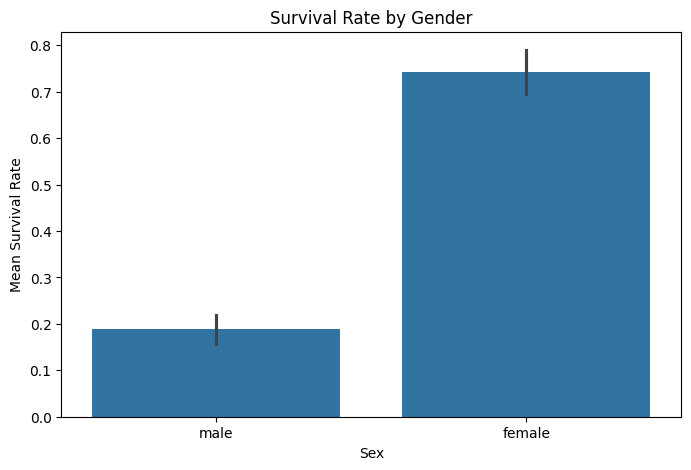

In [79]:
#We are importing some extra functions beside pandas in order to visualise our data in an creative manner
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("/content/drive/MyDrive/ConceptAndTechnologiesOfAI/Titanic-Dataset.csv")

# 1️⃣ Compare mean survival rates by gender
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:")
print(mean_survival_by_sex)

# 2️⃣ Visualize survival distributions by gender
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.ylabel("Mean Survival Rate")
plt.show()


Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

Mean survival rates by Sex and Embarked:
Sex     Embarked
female  C           0.876712
        Q           0.750000
        S           0.689655
male    C           0.305263
        Q           0.073171
        S           0.174603
Name: Survived, dtype: float64


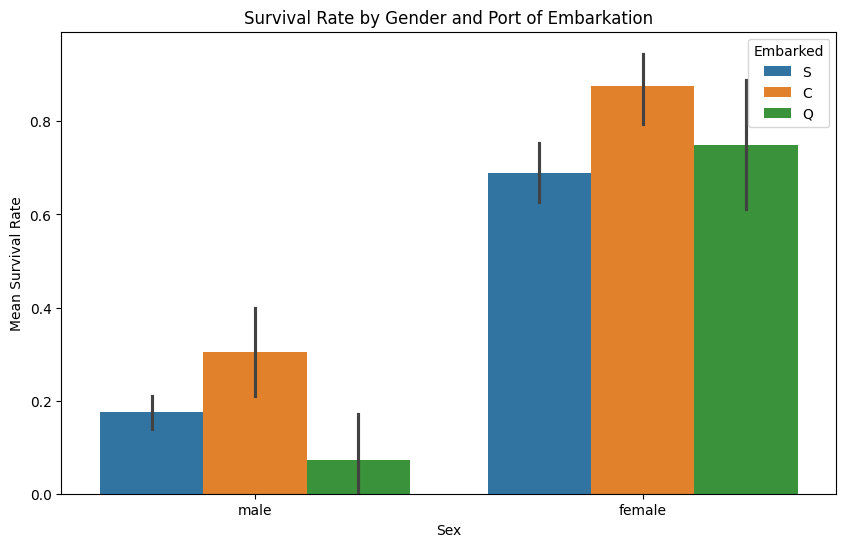

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/ConceptAndTechnologiesOfAI/Titanic-Dataset.csv")

#Compare mean survival rates by Sex and Embarked
mean_survival = df.groupby(['Sex', 'Embarked'])['Survived'].mean()
print("Mean survival rates by Sex and Embarked:")
print(mean_survival)

#Visualize survival distributions by Sex and Embarked
plt.figure(figsize=(10,6))
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df)
plt.title("Survival Rate by Gender and Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.show()


Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

Mean survival rates by AgeGroup and Pclass:
   AgeGroup  Pclass  Survived
0        Q1       1  0.809524
1        Q1       2  0.742857
2        Q1       3  0.333333
3        Q2       1  0.761905
4        Q2       2  0.400000
5        Q2       3  0.197674
6        Q3       1  0.666667
7        Q3       2  0.416667
8        Q3       3  0.283582
9        Q4       1  0.777778
10       Q4       2  0.461538
11       Q4       3  0.166667
12       Q5       1  0.506667
13       Q5       2  0.363636
14       Q5       3  0.088235


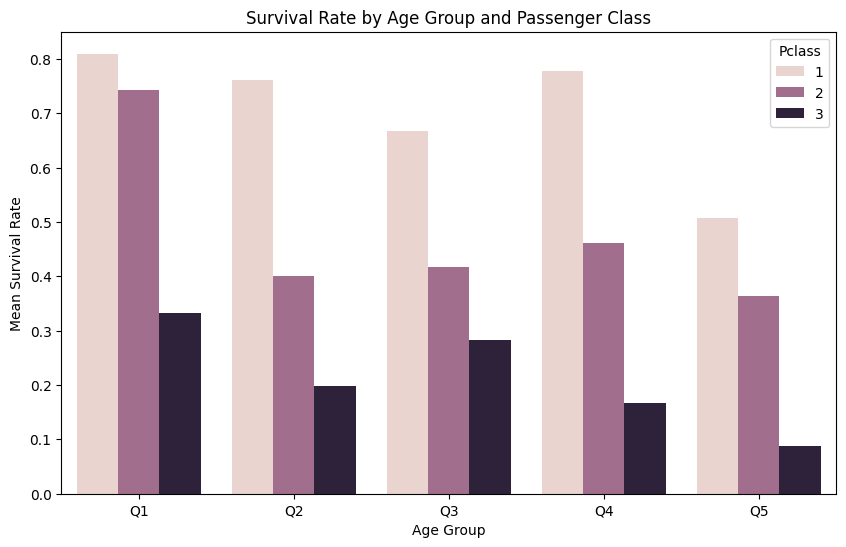

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv("/content/drive/MyDrive/ConceptAndTechnologiesOfAI/Titanic-Dataset.csv")

#Break 'Age' into 5 quantiles
df['AgeGroup'] = pd.qcut(df['Age'], 5, labels=['Q1','Q2','Q3','Q4','Q5'])

#Compute mean survival rates by AgeGroup and Pclass
mean_survival = df.groupby(['AgeGroup','Pclass'], observed=False)['Survived'].mean().reset_index()
print("Mean survival rates by AgeGroup and Pclass:")
print(mean_survival)

#Visualize survival rates
plt.figure(figsize=(10,6))
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=mean_survival)
plt.title("Survival Rate by Age Group and Passenger Class")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Age Group")
plt.show()
